In [1]:
import pandas as pd
messages=pd.read_csv(r'C:\Users\pc\Desktop\Machine Learning\SmsSpamOrHam\sms+spam+collection\SMSCollection.csv', sep='\t', names= ["label","message"])

import nltk
import re

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [2]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
messages.tail()

,label,message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [4]:
wnl=WordNetLemmatizer()
corpus=[]
for i in range(0,len(messages)):
    review=re.sub('[^a-zA-Z]',' ',messages['message'][i])
    review=review.lower()
    review=review.split()
    
    review=[wnl.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=5000) 
X=cv.fit_transform(corpus).toarray() 

y=pd.get_dummies(messages['label'])
y=y.iloc[:,1].values 
y

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [6]:
#Multinomial Naive Bayes
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

mv = MultinomialNB()
spam_detection_model = mv.fit(X_train, y_train)

y_pred_nb = spam_detection_model.predict(X_test)

In [7]:
#Random Forest Classifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

rf = RandomForestClassifier()
spam_detection_model = rf.fit(X_train, y_train)

y_pred_rf = spam_detection_model.predict(X_test)

In [ ]:
#Decision Tree Classifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

dt = DecisionTreeClassifier()
spam_detection_model = dt.fit(X_train, y_train)

y_pred_dt= spam_detection_model.predict(X_test)

In [ ]:
#K-Nearest Neighbours Classifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

knn = KNeighborsClassifier()
spam_detection_model = knn.fit(X_train, y_train)

y_pred_knn = spam_detection_model.predict(X_test)

In [ ]:
#Support Vector Classifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

svc = SVC()
spam_detection_model = svc.fit(X_train, y_train)

y_pred_svc = spam_detection_model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

In [ ]:
# Confusion Matrices
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

In [ ]:
# Accuracy Scores
accuracy_nb = accuracy_score(y_test, y_pred_nb)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

In [ ]:
# F1 Scores
f1_nb = f1_score(y_test, y_pred_nb, average='weighted')
f1_svc = f1_score(y_test, y_pred_svc, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

In [20]:
print("Multinomial Naive Bayes:")
print("Confusion Matrix:\n", conf_matrix_nb)
print("Accuracy:", accuracy_nb)
print("F1 Score:", f1_nb)

print("\nSVM:")
print("Confusion Matrix:\n", conf_matrix_svc)
print("Accuracy:", accuracy_svc)
print("F1 Score:", f1_svc)

print("\nRandom Forest:")
print("Confusion Matrix:\n", conf_matrix_rf)
print("Accuracy:", accuracy_rf)
print("F1 Score:", f1_rf)

print("\nDecision Tree:")
print("Confusion Matrix:\n", conf_matrix_dt)
print("Accuracy:", accuracy_dt)
print("F1 Score:", f1_dt)

print("\nKNN:")
print("Confusion Matrix:\n", conf_matrix_knn)
print("Accuracy:", accuracy_knn)
print("F1 Score:", f1_knn)

Multinomial Naive Bayes:
Confusion Matrix:
 [[944  11]
 [  9 151]]
Accuracy: 0.9820627802690582
F1 Score: 0.9821090848618373

SVM:
Confusion Matrix:
 [[955   0]
 [ 17 143]]
Accuracy: 0.9847533632286996
F1 Score: 0.9843929052347059

Random Forest:
Confusion Matrix:
 [[955   0]
 [ 20 140]]
Accuracy: 0.9820627802690582
F1 Score: 0.98155781190703

Decision Tree:
Confusion Matrix:
 [[955   0]
 [ 94  66]]
Accuracy: 0.915695067264574
F1 Score: 0.9001398369973018

KNN:
Confusion Matrix:
 [[955   0]
 [ 94  66]]
Accuracy: 0.915695067264574
F1 Score: 0.9001398369973018


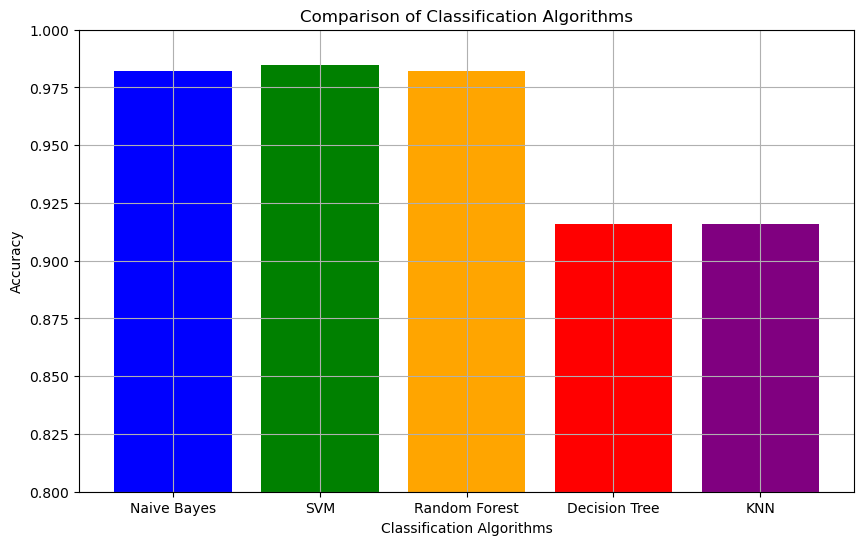

In [21]:
import matplotlib.pyplot as plt

classifiers = ['Multinomial Naive Bayes', 'SVM', 'Random Forest', 'Decision Tree', 'KNN']

accuracies = [accuracy_nb, accuracy_svc, accuracy_rf, accuracy_dt, accuracy_knn]

plt.figure(figsize=(10, 6))
plt.bar(classifiers, accuracies, color=['blue', 'green', 'orange', 'red', 'purple'])
plt.xlabel('Classification Algorithms')
plt.ylabel('Accuracy')
plt.title('Comparison of Classification Algorithms')
plt.ylim(0.8, 1.0)  # Set the y-axis range for better visualization
plt.grid(True)
plt.show()